# Poison dart frogs

Can you estimate how toxic a poison dart frog is based on its brightness?

Poison dart frogs are small, colorful frogs from Central and South America. They're famous for their toxic skin, which some indigenous people use for blow darts.

Scientists studied the connection between the bright colors and toxicity of the poison dart frog **Dendrobates pumilio**. While they're usually red with blue legs, they can be found in about 15 different colors in Panama.

The file `frog-reflectance.csv` contains the average brightness (from 0 to 1) of 10 frog populations, measured on both the back and belly.

The file `frog-toxicity.csv` provides a `toxicity` score (from 0 to 1) for 48 frogs from the same 10 populations. Toxicity was tested by injecting frog skin extracts into mice and recording how long it took them to fall back asleep. Longer times suggest higher `toxicity`.

In [1]:
# FOR GOOGLE COLAB ONLY.
# Uncomment and run the code below. A dialog will appear to upload files.
# Upload 'frog-reflectance.csv', 'frog-toxicity.csv', and 'linear_model.py'.

# from google.colab import files
# uploaded = files.upload()

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from linear_model import LinearModel

df = pd.read_csv('frog-reflectance.csv')
df.head()

,pop_id,back_brightness,belly_brightness
0,AG,0.43,0.46
1,AL,0.64,0.42
2,BCG,1.00,0.95
3,BCO,0.82,1.00
4,CA,0.46,0.51


In [3]:
tox = pd.read_csv('frog-toxicity.csv')
tox.head()

,pop_id,frog_id,toxicity
0,BCO,BC167,0.886925
1,BCO,BC166,0.803917
2,BCO,BC171,0.625008
3,BCO,BC169,0.975847
4,BCO,BC165,0.774033


# Project Ideas

- Build two linear models:
	- Model 1: `toxicity` (x-axis) vs. `back_brightness`
	
	- Model 2: `toxicity` vs. `belly_brightness`

- To create the models, first calculate the average `toxicity` for each `pop_id`, then merge these values into the main dataframe (`df`).

- Visualize the data by creating scatter plots with best-fit lines for both models.

- Compare the goodness of fit between back and belly brightness and explore possible biological explanations for any differences in correlation.


In [4]:
# YOUR CODE HERE (add additional cells as needed)

# Linear model API

# linear = LinearModel()
# linear.fit(x, y)
# linear.predict(x)
# linear.plot_model(x_min, x_max, color="black")
# linear.print_model_info(self):


  pop_id  toxicity
0     AG  0.632902
1     AL  0.500877
2    BCG  0.885207
3    BCO  0.813146
4     CA  0.364581
5     CO  0.209414
6   PoSo  0.293478
7     SC  0.618246
8     SH  0.387053
9     SO  1.000000


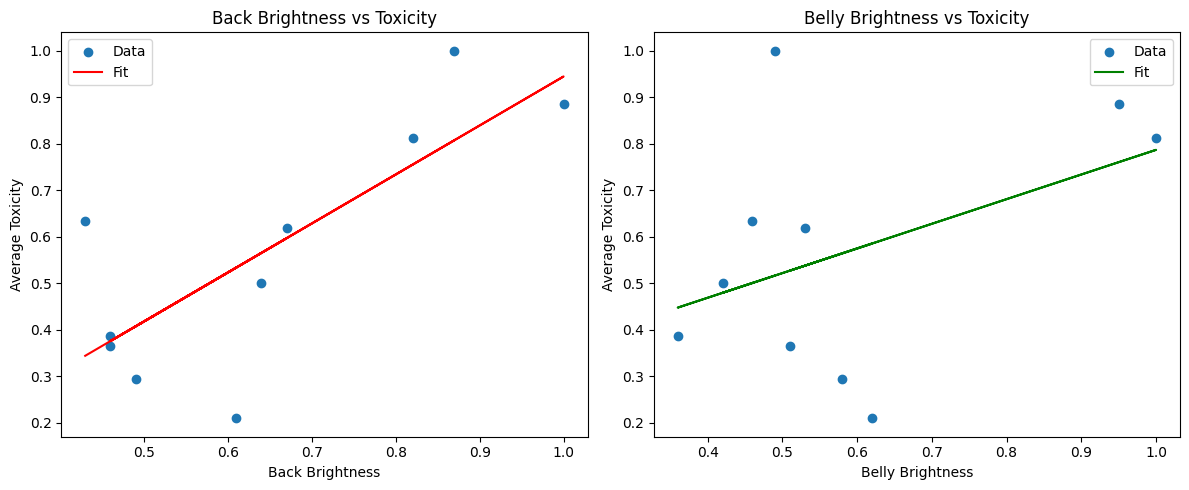

R² for back brightness model: 0.607
R² for belly brightness model: 0.184


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import numpy as np

# Load data
tox = pd.read_csv("frog-toxicity.csv")
reflect = pd.read_csv("frog-reflectance.csv")

# Clean any whitespace from column names
reflect.columns = reflect.columns.str.strip()

# Step 1: Compute average toxicity per pop_id
avg_tox = tox.groupby("pop_id")["toxicity"].mean().reset_index()
print(avg_tox)

# Step 2: Merge into reflectance dataframe
df = reflect.merge(avg_tox, on="pop_id", how="inner")

# Step 3a: Model 1 - Back brightness
X_back = df[["back_brightness"]]
y = df["toxicity"]
model_back = LinearRegression().fit(X_back, y)
df["pred_back"] = model_back.predict(X_back)

# Step 3b: Model 2 - Belly brightness
X_belly = df[["belly_brightness"]]
model_belly = LinearRegression().fit(X_belly, y)
df["pred_belly"] = model_belly.predict(X_belly)

# Step 4: Visualization
plt.figure(figsize=(12, 5))

# Back
plt.subplot(1, 2, 1)
plt.scatter(df["back_brightness"], df["toxicity"], label="Data")
plt.plot(df["back_brightness"], df["pred_back"], color="red", label="Fit")
plt.xlabel("Back Brightness")
plt.ylabel("Average Toxicity")
plt.title("Back Brightness vs Toxicity")
plt.legend()

# Belly
plt.subplot(1, 2, 2)
plt.scatter(df["belly_brightness"], df["toxicity"], label="Data")
plt.plot(df["belly_brightness"], df["pred_belly"], color="green", label="Fit")
plt.xlabel("Belly Brightness")
plt.ylabel("Average Toxicity")
plt.title("Belly Brightness vs Toxicity")
plt.legend()

plt.tight_layout()
plt.show()

# Step 5: Compare R²
r2_back = r2_score(y, df["pred_back"])
r2_belly = r2_score(y, df["pred_belly"])
print(f"R² for back brightness model: {r2_back:.3f}")
print(f"R² for belly brightness model: {r2_belly:.3f}")


Are brightly colored frogs more poisonous?

Yes, in general, frogs with higher brightness tend to have higher toxicity.